In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# from config import api_key '8d04447e785dbaddedf8b2863448385400974338'
# from config import absjson
absjson = r'./abs_data_2019.json'

In [2]:
#before any import run this
%load_ext autoreload
%autoreload 2

# set max_rows option to None to display all rows
pd.options.display.max_rows = 999

In [32]:
HOST = 'https://api.census.gov/data'
year = '2019'
dataset = 'abscs'
# geography = 'us'
geography = 'state'
# geography = 'metropolitan statistical area/micropolitan statistical area'
params = {
    'get': 'NAICS2017,NAICS2017_LABEL,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL',
    'for': f'{geography}:*'
    # 'key': api_key
}
base_url = '/'.join([HOST,year,dataset])
response = requests.get(base_url,params=params)

# GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F

In [4]:
# var = 'variables'
# varname = 'NAICS2017'
# NAICS_url = '/'.join([HOST,year,dataset,var,varname])

# NAICS_response = requests.get(NAICS_url)
# NAICS_data = NAICS_response.json()
# NAICS_df = pd.DataFrame(columns=['NAICS','Industry'])

# NAICS_data

# for item in NAICS_data['values']['item']:
#     code = item[0]
#     industry = item[1]
# NAICS_df = NAICS_df.append({'NAICS':code,'Industry':industry},ignore_index=True)
# NAICS_df

In [33]:
data = response.json()
with open(absjson, 'w') as f:
    json.dump(data, f)

In [71]:
census = pd.read_json(absjson)
census = pd.DataFrame(data[1:], columns=data[0])

states = census[['NAME']].drop_duplicates()
print(len(states['NAME']))
states.sort_values('NAME')

51


,NAME
59800,Alabama
59801,Alaska
46005,Arizona
54188,Arkansas
63395,California
69195,Colorado
77432,Connecticut
73954,Delaware
66199,District of Columbia
69357,Florida


In [60]:
sexes=census[['SEX','SEX_LABEL']].drop_duplicates()
sexes

,SEX,SEX_LABEL
0,001,Total
1,004,Equally male/female
5,002,Female
6,003,Male


In [37]:
races=census[['RACE_GROUP','RACE_GROUP_LABEL']].drop_duplicates()
races

,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL
0,60,60,Asian
1,00,00,Total
2,30,30,White
3,92,92,Nonminority
11,50,50,American Indian and Alaska Native
13,90,90,Minority
15,91,91,Equally minority/nonminority
23,40,40,Black or African American
215,70,70,Native Hawaiian and Other Pacific Islander


In [58]:
vet_statuses=census[['VET_GROUP','VET_GROUP_LABEL']].drop_duplicates()
vet_statuses

,VET_GROUP,VET_GROUP_LABEL
0,001,Total
1,002,Veteran
2,004,Nonveteran
3,003,Equally veteran/nonveteran


In [55]:
all_sectors = census[['NAICS2017','NAICS2017_LABEL']].drop_duplicates()
sectors = all_sectors[all_sectors['NAICS2017'].str.len().isin([2,5])]
sectors

,NAICS2017,NAICS2017_LABEL
0,00,Total for all sectors
3,11,"Agriculture, forestry, fishing and hunting"
8,22,Utilities
62,42,Wholesale trade
117,31-33,Manufacturing
234,21,"Mining, quarrying, and oil and gas extraction"
283,23,Construction
666,72,Accommodation and food services
670,81,Other services (except public administration)
675,99,Industries not classified


#questions to investigate

ALEX
- how male/female jobs compare with education levels (e.g. as F enter workforce, job is devalued)
- females now outnumber male college grads - will this devalue a degree?

JESS
- vet status....something?


- race...pay gap charted by state, maybe compare to F/M pay gap - is there a correlation?

VANESSA
- TBD after EDA


In [7]:
census.info()
census.shape
census.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              4730 non-null   object
 1   EMP               4730 non-null   object
 2   PAYANN            4730 non-null   object
 3   SEX               4730 non-null   object
 4   SEX_LABEL         4730 non-null   object
 5   RACE_GROUP        4730 non-null   object
 6   RACE_GROUP        4730 non-null   object
 7   RACE_GROUP_LABEL  4730 non-null   object
 8   VET_GROUP         4730 non-null   object
 9   VET_GROUP_LABEL   4730 non-null   object
 10  state             4730 non-null   object
dtypes: object(11)
memory usage: 406.6+ KB


Index(['NAME', 'EMP', 'PAYANN', 'SEX', 'SEX_LABEL', 'RACE_GROUP', 'RACE_GROUP',
       'RACE_GROUP_LABEL', 'VET_GROUP', 'VET_GROUP_LABEL', 'state'],
      dtype='object')

In [8]:
# Convert the PAYANN column from string(object) to a numeric type
census['PAYANN'] = pd.to_numeric(census['PAYANN'])

# Pivot the data to create a multi-level index with state, sex, veteran status
pivot = pd.pivot_table(census, values='PAYANN', index=['NAME', 'SEX_LABEL', 'VET_GROUP_LABEL','RACE_GROUP_LABEL'], aggfunc='sum')
# pivot.head(10)

# Pivot the data to create a multi-level index with state, sex, veteran status
pivot2 = pd.pivot_table(census, values='PAYANN', index=['NAME', 'SEX_LABEL', 'VET_GROUP_LABEL'],columns='RACE_GROUP_LABEL', aggfunc='sum')
pivot2

RACE_GROUP_LABEL                                        American Indian and Alaska Native  \
NAME    SEX_LABEL           VET_GROUP_LABEL                                                 
Alabama Equally male/female Equally veteran/nonveteran                                0.0   
                            Nonveteran                                                0.0   
                            Total                                                     0.0   
                            Veteran                                                   NaN   
        Female              Nonveteran                                           143378.0   
...                                                                                   ...   
Wyoming Male                Veteran                                                   0.0   
        Total               Equally veteran/nonveteran                                NaN   
                            Nonveteran                                            10944.0   
                            Total                                                 11626.0   
                            Veteran                                                   0.0   

RACE_GROUP_LABEL                                           Asian  \
NAME    SEX_LABEL           VET_GROUP_LABEL                        
Alabama Equally male/female Equally veteran/nonveteran       NaN   
                            Nonveteran                       0.0   
                            Total                            0.0   
                            Veteran                          NaN   
        Female              Nonveteran                  293179.0   
...                                                          ...   
Wyoming Male                Veteran                          0.0   
        Total               Equally veteran/nonveteran       NaN   
                            Nonveteran                  106158.0   
                            Total                       106556.0   
                            Veteran                          0.0   

RACE_GROUP_LABEL                                        Black or African American  \
NAME    SEX_LABEL           VET_GROUP_LABEL                                         
Alabama Equally male/female Equally veteran/nonveteran                        0.0   
                            Nonveteran                                        0.0   
                            Total                                             0.0   
                            Veteran                                           NaN   
        Female              Nonveteran                                   179714.0   
...                                                                           ...   
Wyoming Male                Veteran                                           0.0   
        Total               Equally veteran/nonveteran                        NaN   
                            Nonveteran                                        0.0   
                            Total                                             0.0   
                            Veteran                                           0.0   

RACE_GROUP_LABEL                                        Equally minority/nonminority  \
NAME    SEX_LABEL           VET_GROUP_LABEL                                            
Alabama Equally male/female Equally veteran/nonveteran                           NaN   
                            Nonveteran                                           NaN   
                            Total                                            43744.0   
                            Veteran                                              NaN   
        Female              Nonveteran                                           NaN   
...                                                                              ...   
Wyoming Male                Veteran                                              NaN   
       

In [29]:
# Create a bar chart for each state that analyzes the sex, veteran status, race, and annual pay
# for state in pivot2.index.levels[0]:
#     plot_data = pivot2.loc[state]

Colorado = census.loc[census['NAME']=='Colorado',:]
Colorado


,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,state
2936,Colorado,5940,233816,003,Male,40,40,Black or African American,001,Total,08
2937,Colorado,69124,2963249,003,Male,90,90,Minority,001,Total,08
2938,Colorado,11243,320664,004,Equally male/female,90,90,Minority,001,Total,08
2939,Colorado,6867,320444,001,Total,90,90,Minority,002,Veteran,08
2940,Colorado,0,0,001,Total,91,91,Equally minority/nonminority,002,Veteran,08
...,...,...,...,...,...,...,...,...,...,...,...
3033,Colorado,29777,1437698,001,Total,92,92,Nonminority,003,Equally veteran/nonveteran,08
3034,Colorado,1056975,51309898,001,Total,00,00,Total,004,Nonveteran,08
3035,Colorado,227331,9156615,002,Female,00,00,Total,004,Nonveteran,08
3036,Colorado,706081,37462603,003,Male,00,00,Total,004,Nonveteran,08


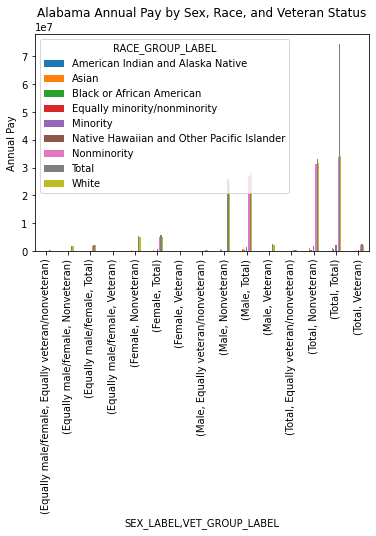

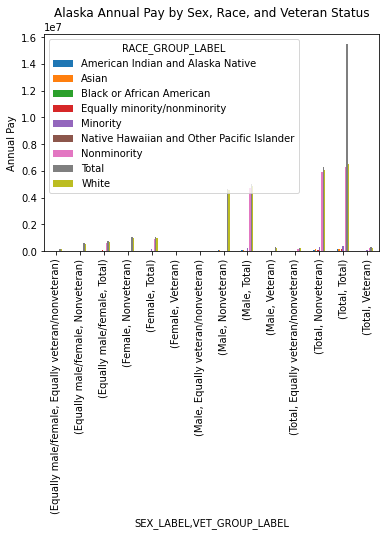

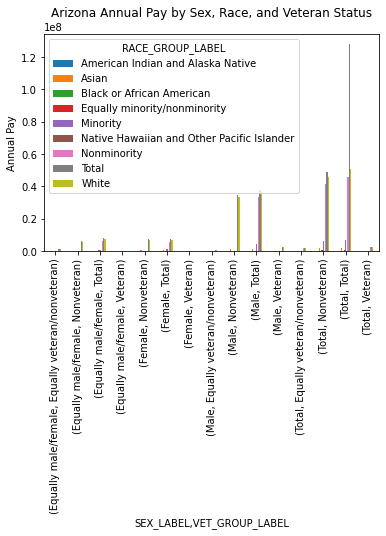

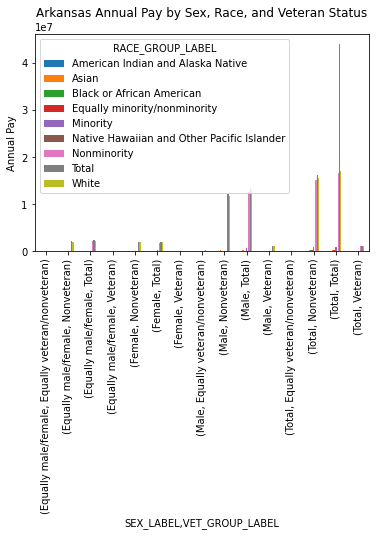

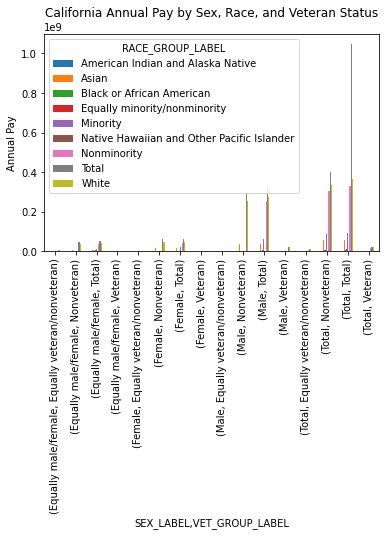

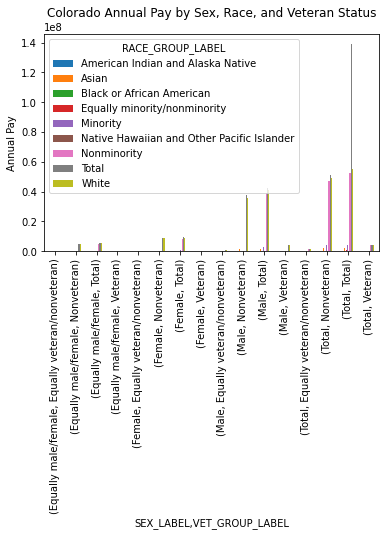

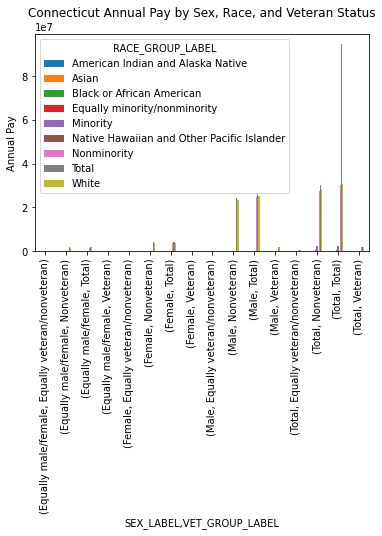

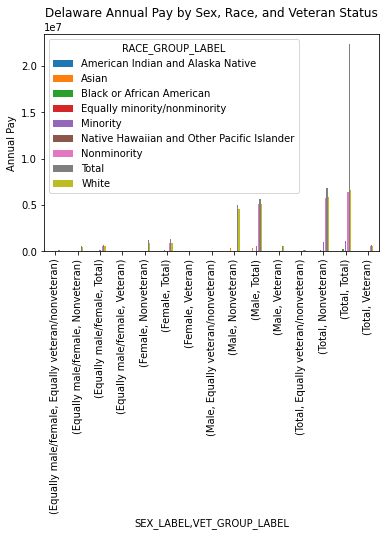

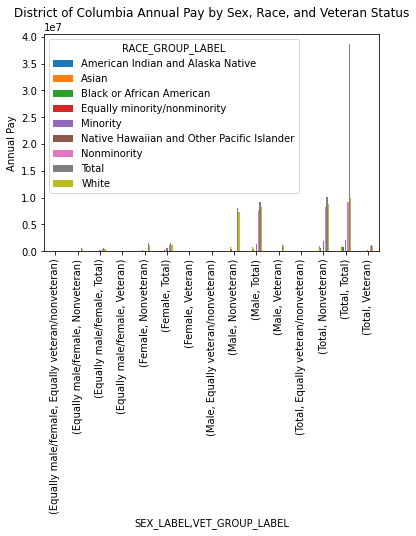

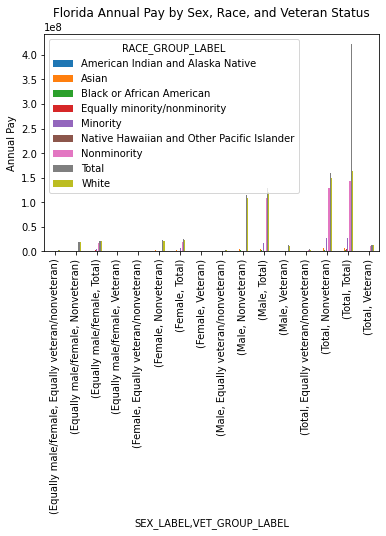

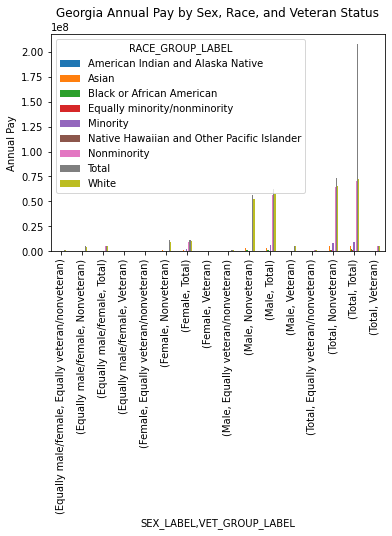

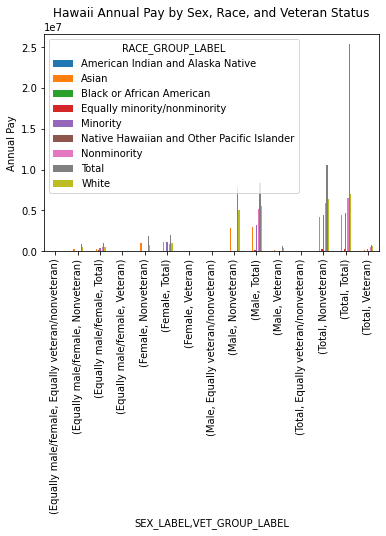

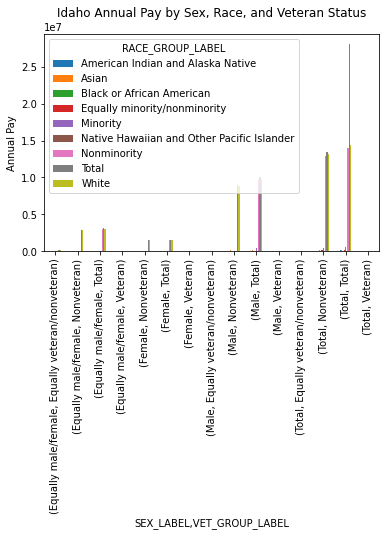

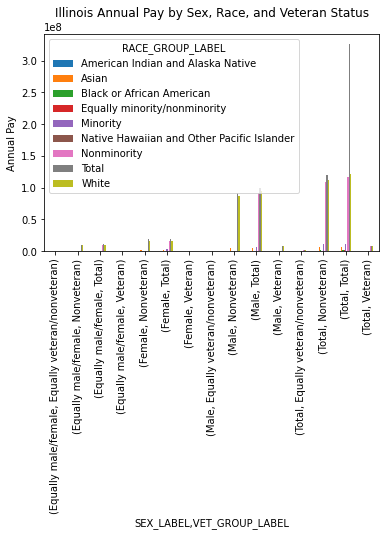

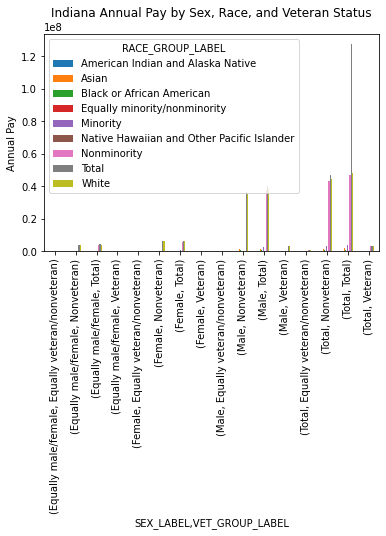

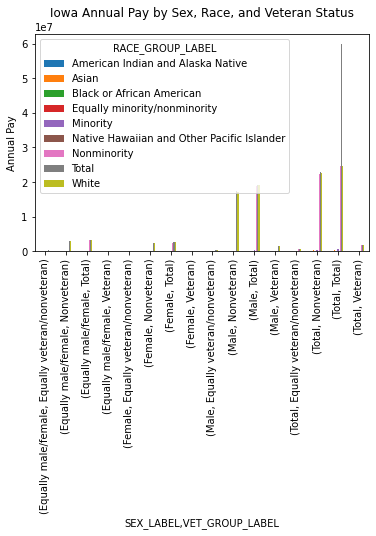

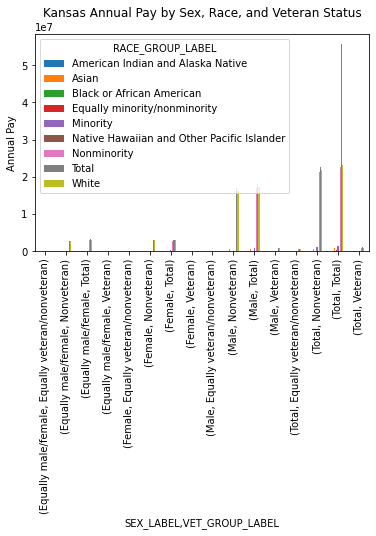

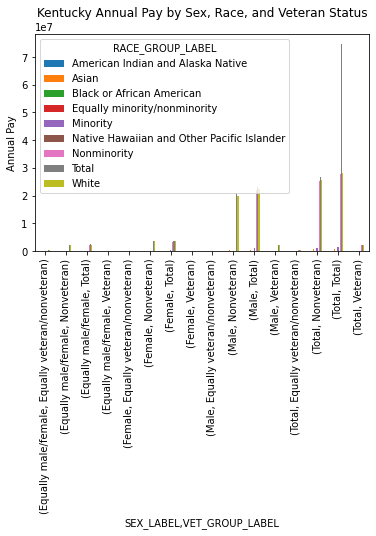

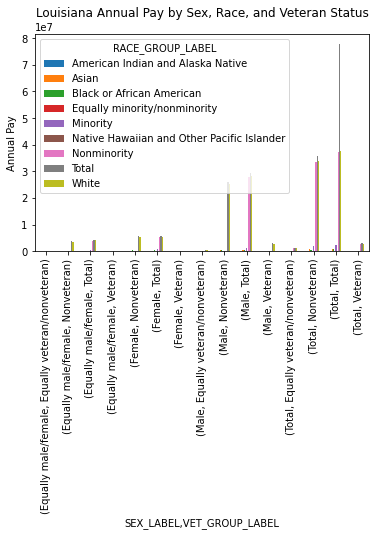

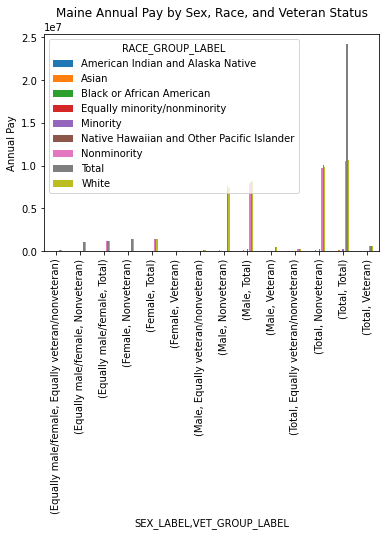

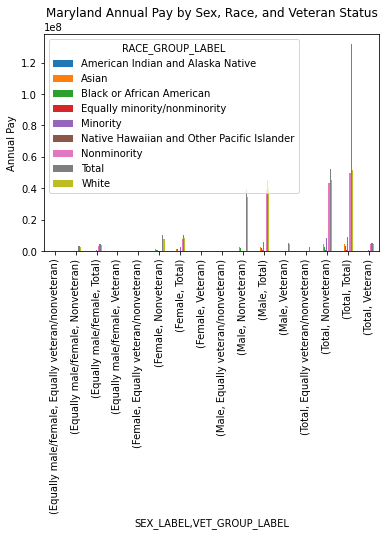

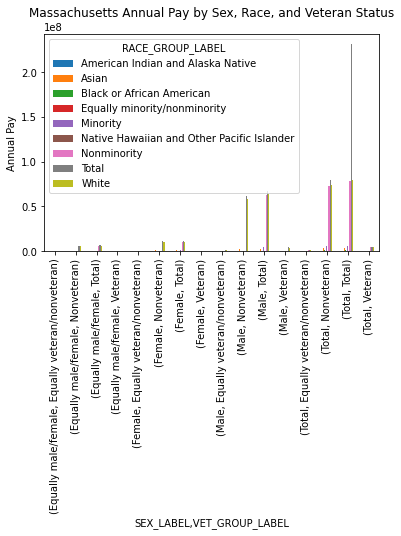

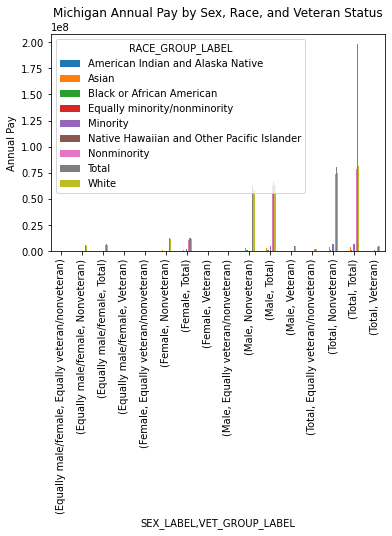

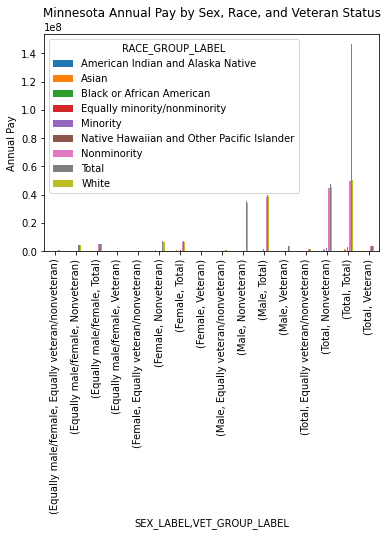

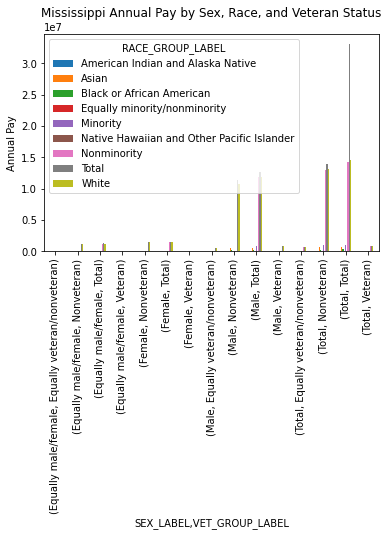

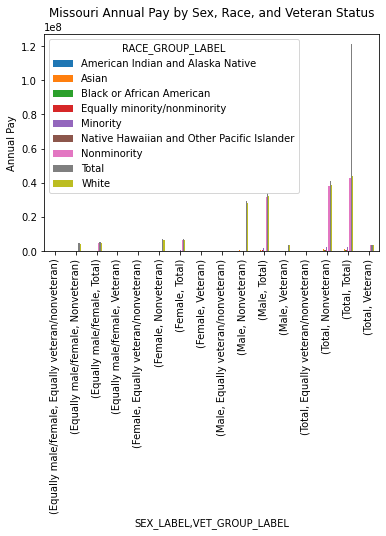

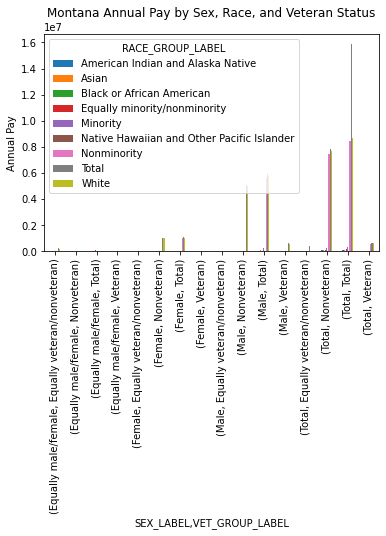

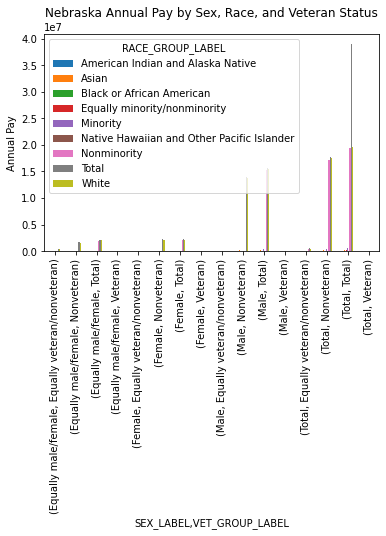

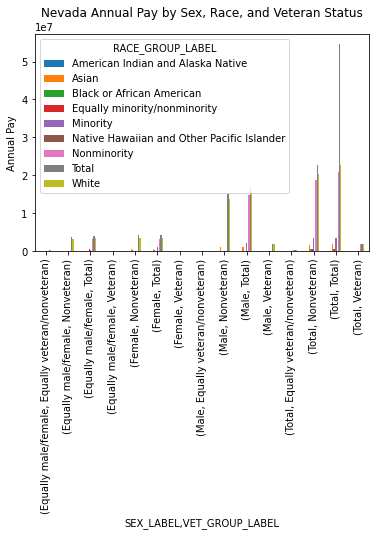

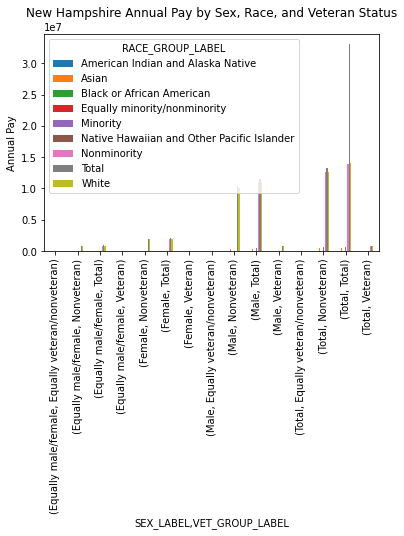

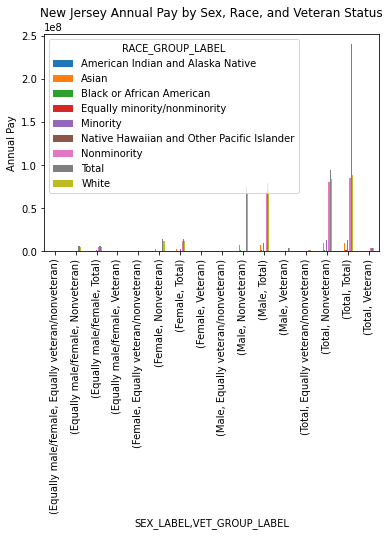

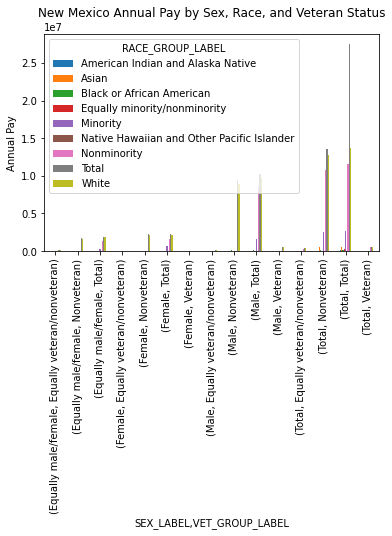

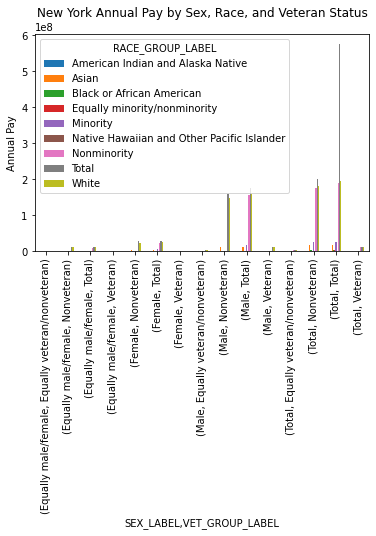

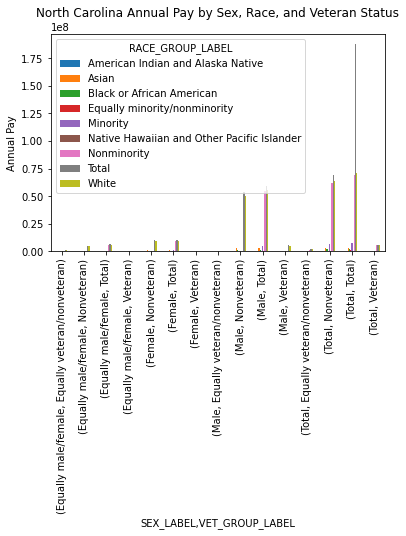

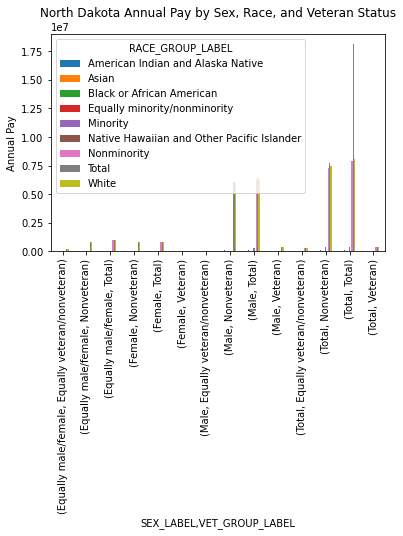

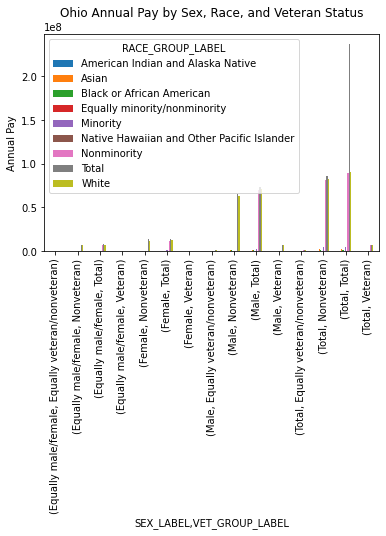

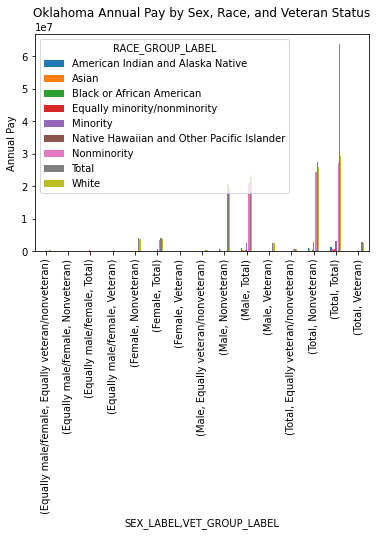

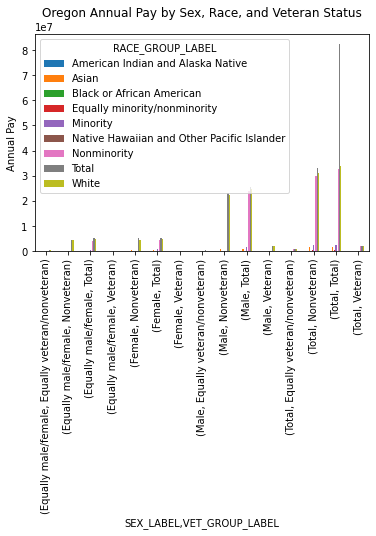

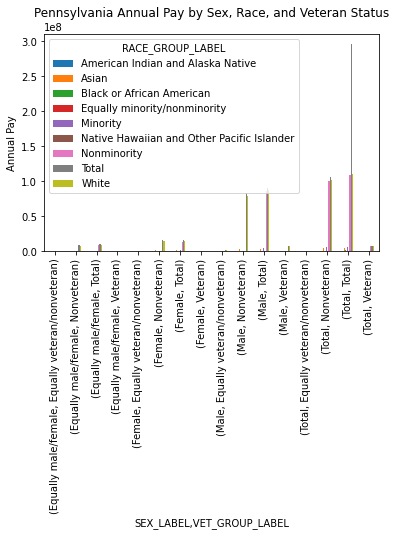

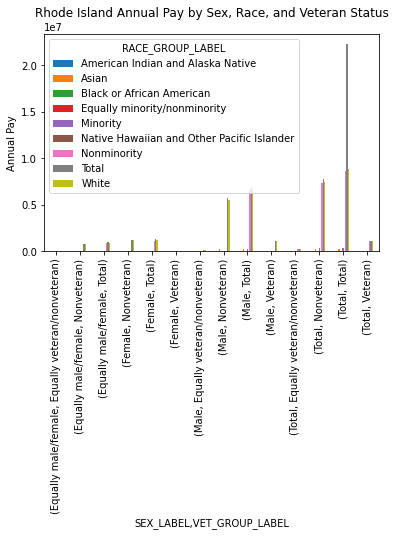

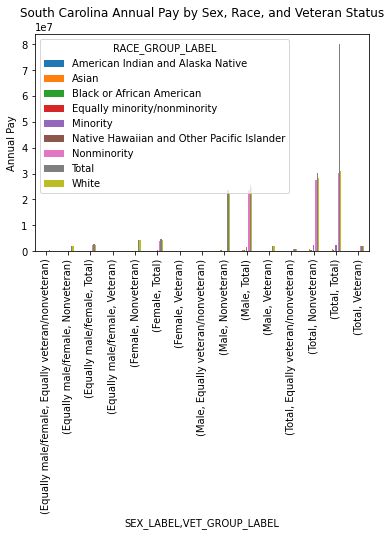

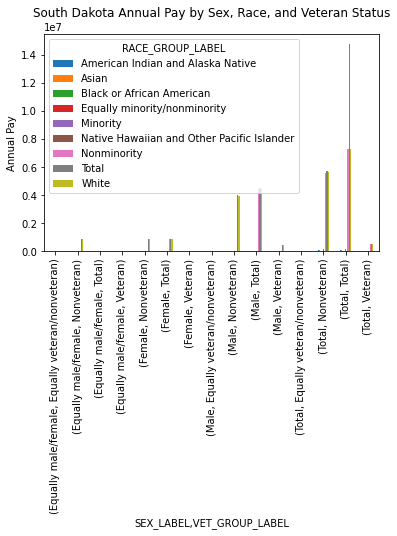

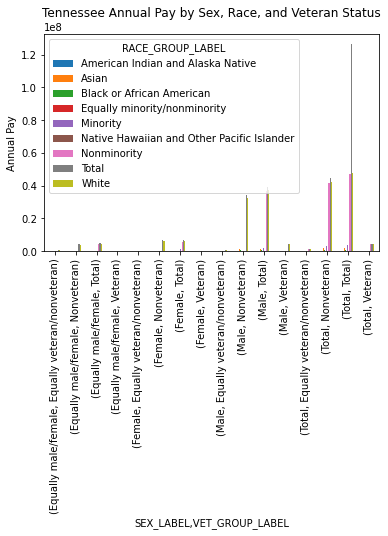

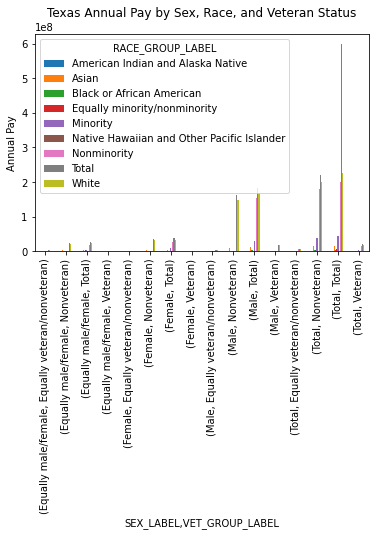

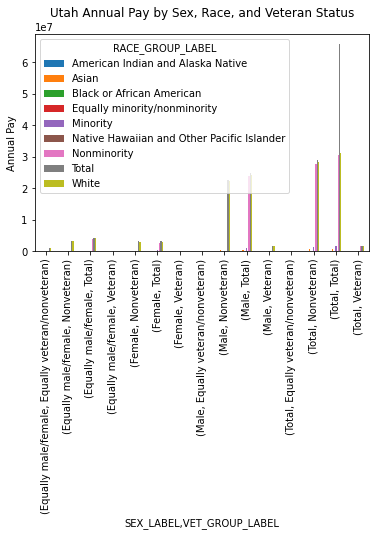

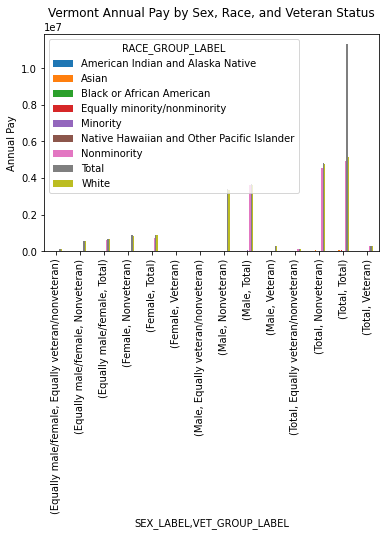

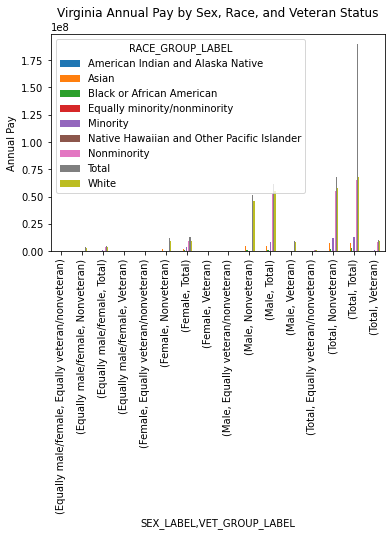

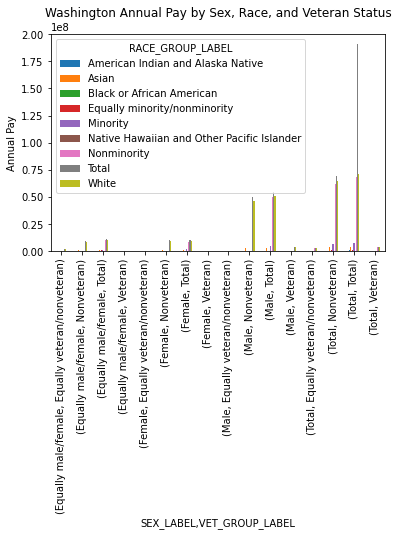

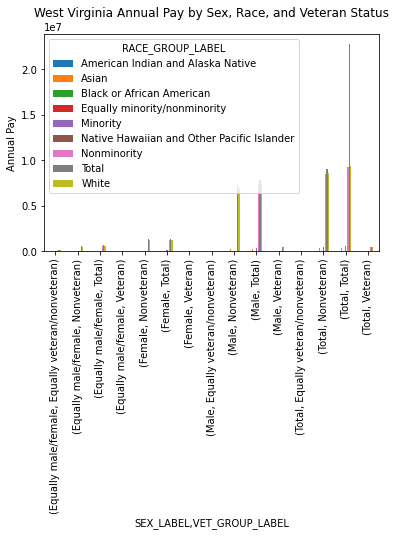

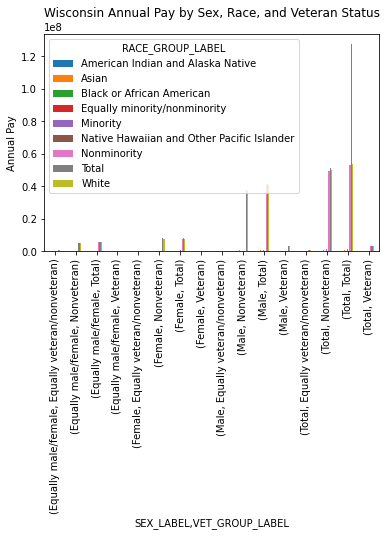

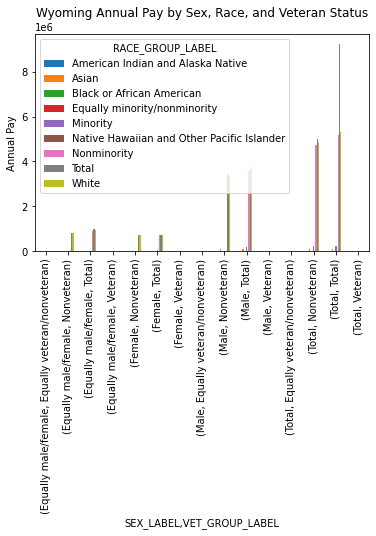

In [10]:
# Create a bar chart for each state that analyzes the sex, veteran status, race, and annual pay
for state in pivot2.index.levels[0]:
    plot_data = pivot2.loc[state]
    plot_data.plot(kind='bar', title=f'{state} Annual Pay by Sex, Race, and Veteran Status', ylabel='Annual Pay')
    plt.show()
